<a href="https://colab.research.google.com/github/dipak140/ML_Practice/blob/master/ExploringDataDistributionTutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import scipy.stats 
import pandas as pd

In [111]:
from google.colab import files
uploaded = files.upload()

Saving state.csv to state (7).csv


In [0]:
import io
state_data = pd.read_csv(io.BytesIO(uploaded['state.csv']))

In [113]:
state_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
State           50 non-null object
Population      50 non-null int64
Murder.Rate     50 non-null float64
Abbreviation    50 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


Percentiles are also valuable to summarize the
entire distribution. Here we use the quantile method from pandas to display some percentiles of murder rate by state.

In [114]:
state_data['Murder.Rate'].quantile([.05, .25, .5, .75, .95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

The median is 4 murders per 100,000 people. 

Now, lets move on to our first tool in exploring this data. 

**Boxplots**, are based on percentiles and give a quick way to visualize the distribution of data. In python, this task can be accomplished using Pandas, Seaborn or Matplotlib. Lets see how.

**Using Pandas**

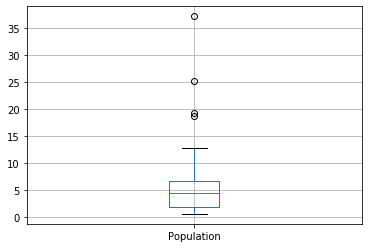

In [115]:
state_data.Population = state_data.Population/1000000
state_data.boxplot(column = ['Population'], )

The top and bottom of the box are the 75th and 25th percentiles, respectively. The dashed lines, referred to as whiskers, extend from the top and bottom to indicate the range for the bulk of the data. Any data outside of the
whiskers is plotted as single points.

**Using Seaborn**

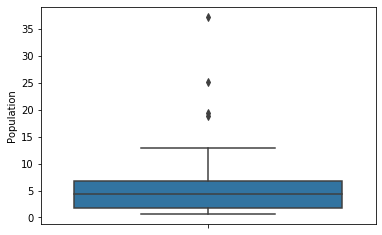

In [116]:
import seaborn as sns
ax = sns.boxplot(y = state_data["Population"])

You can altenatively use Matplotlib for the same purpose

**Frequency Table and Histograms**

In [117]:
state_data.Population = state_data.Population * 1000000
pd.DataFrame(pd.Series.value_counts(state_data.Population, bins = 11))


,Population
"(526935.669, 3899110.545]",24
"(3899110.545, 7234595.091]",14
"(7234595.091, 10570079.636]",5
"(10570079.636, 13905564.182]",3
"(17241048.727, 20576533.273]",2
"(33918471.455, 37253956.0]",1
"(23912017.818, 27247502.364]",1
"(30582986.909, 33918471.455]",0
"(27247502.364, 30582986.909]",0
"(20576533.273, 23912017.818]",0


The above code uses Value count to publish the population frequency within different ranges. The bin parameter in values helps divide the range into a given number of input(11 in this case).


**Histogram** can be plotted using either Matplotlib or Pandas library. Lets see how both of them perform for the Column Murder.Rate

(array([ 5., 10.,  8.,  7.,  9.,  8.,  1.,  0.,  1.,  1.]),
 array([ 0.9 ,  1.84,  2.78,  3.72,  4.66,  5.6 ,  6.54,  7.48,  8.42,
         9.36, 10.3 ]),
 <a list of 10 Patch objects>)

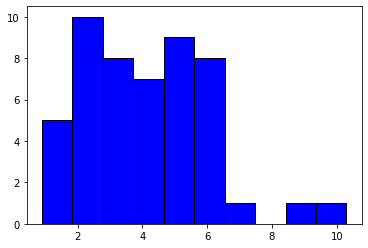

In [142]:
from matplotlib import pyplot as plt
plt.hist(state_data['Murder.Rate'], color = 'blue', edgecolor = 'black')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fadb61e4a90>,
      dtype=object)

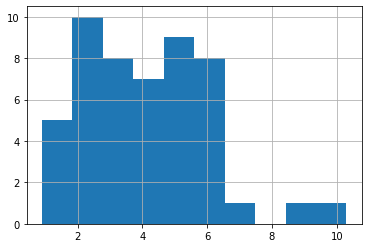

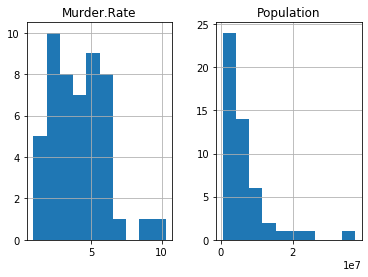

In [140]:
state_data['Murder.Rate'].hist()
state_data.hist()

In case of Matplotlib, you need to specify which Numeric columns you want to plot the histogram of. Which is not the case with pandas. For a full description and parameters list, you can use the following links:


1.   Pandas: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html
2.   Matplotlib:  https://pythonspot.com/matplotlib-histogram/




#### **Density Plots**: 
A density plot is a smoothed, continuous version of a histogram estimated from the data. The most common form of estimation is known as kernel density estimation. In this method, a continuous curve (the kernel) is drawn at every individual data point and all of these curves are then added together to make a single smooth density estimation. 

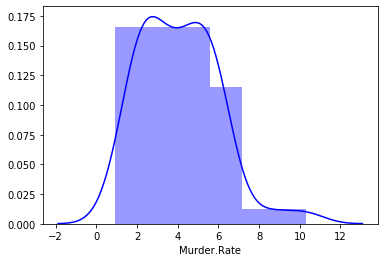

In [144]:
sns.distplot(state_data['Murder.Rate'], hist=True, kde=True, color = 'blue')